# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1l7bHyrjzq839zVZE06cfdDksLabCN2hg"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Future Sales Time-series Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1vi45x-LGEzwvJoQstierOC1QZ11QQUmS)

![alt text](https://drive.google.com/uc?id=1eLLebiXwkN6x1dpsopQmkVNkR9zAYL7H)

![alt text](https://drive.google.com/uc?id=1a_q_DC8NyGBmcrxE0sGV4r6Hl-0w6G0K)

![alt text](https://drive.google.com/uc?id=1hNE0Wwc_bCCIO-AUAi6Xqo_9Bf1Xbh2o)

![alt text](https://drive.google.com/uc?id=1lQVgHsXn4Ur61dgYul1G-CmseLLUCEOB)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


In [2]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory



TASK #2.1: IMPORT SALES TRAINING DATA

In [3]:
# You have to include the full link to the csv file containing your dataset
sales_train_df = pd.read_csv('train.csv')

C:\Users\zsombor.veres-lakos\AppData\Local\Temp\ipykernel_47048\657737565.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [4]:
sales_train_df.head(5)
# almost a million observation
# 1115 unique stores
# Note that sales is the target variable (that's what we are trying to predict)

# Id: transaction ID (combination of Store and date)
# Store: unique store Id
# Sales: sales/day, this is the target variable
# Customers: number of customers on a given day
# Open: Boolean to say whether a store is open or closed (0 = closed, 1 = open)
# Promo: describes if store is running a promo on that day or not
# StateHoliday: indicate which state holiday (a = public holiday, b = Easter holiday, c = Christmas, 0 = None)
# SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
# Data Source: https://www.kaggle.com/c/rossmann-store-sales/data



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_train_df.size

9154881

In [6]:
# 9 columns in total
# 8 features, each contains 1017209 data points
# 1 target variable (sales)
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [7]:
# Average sales amount per day = 5773 Euros, minimum sales per day = 0, maximum sales per day = 41551
# Average number of customers = 633, minimum number of customers = 0, maximum number of customers = 7388
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


TASK #2.2: IMPORT STORE INFORMATION DATA

In [8]:

store_df = pd.read_csv('store.csv')
store_info_df = pd.read_csv('store.csv')

store_df.columns
# StoreType: categorical variable to indicate type of store (a, b, c, d)
# Assortment: describes an assortment level: a = basic, b = extra, c = extended
# CompetitionDistance (meters): distance to closest competitor store
# CompetitionOpenSince [Month/Year]: provides an estimate of the date when competition was open
# Promo2: Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)
# Promo2Since [Year/Week]: date when the store started participating in Promo2
# PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


store_df.CompetitionDistance.mean()

5404.901079136691

In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [10]:
# Let's do the same for the store_info_df data
# Note that the previous dataframe includes the transactions recorded per day (in millions)
# This dataframe only includes information about the unique 1115 stores that are part of this study


In [11]:
# on average, the competition distance is 5404 meters away (5.4 kms)

# TASK #3: EXPLORE DATASET

TASK #3.1: EXPLORE SALES TRAINING DATA

<Axes: >

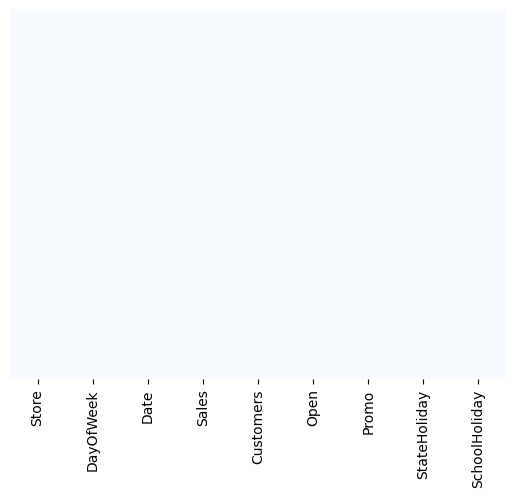

In [12]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(sales_train_df.isnull(), yticklabels=False, cbar = False, cmap = 'Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

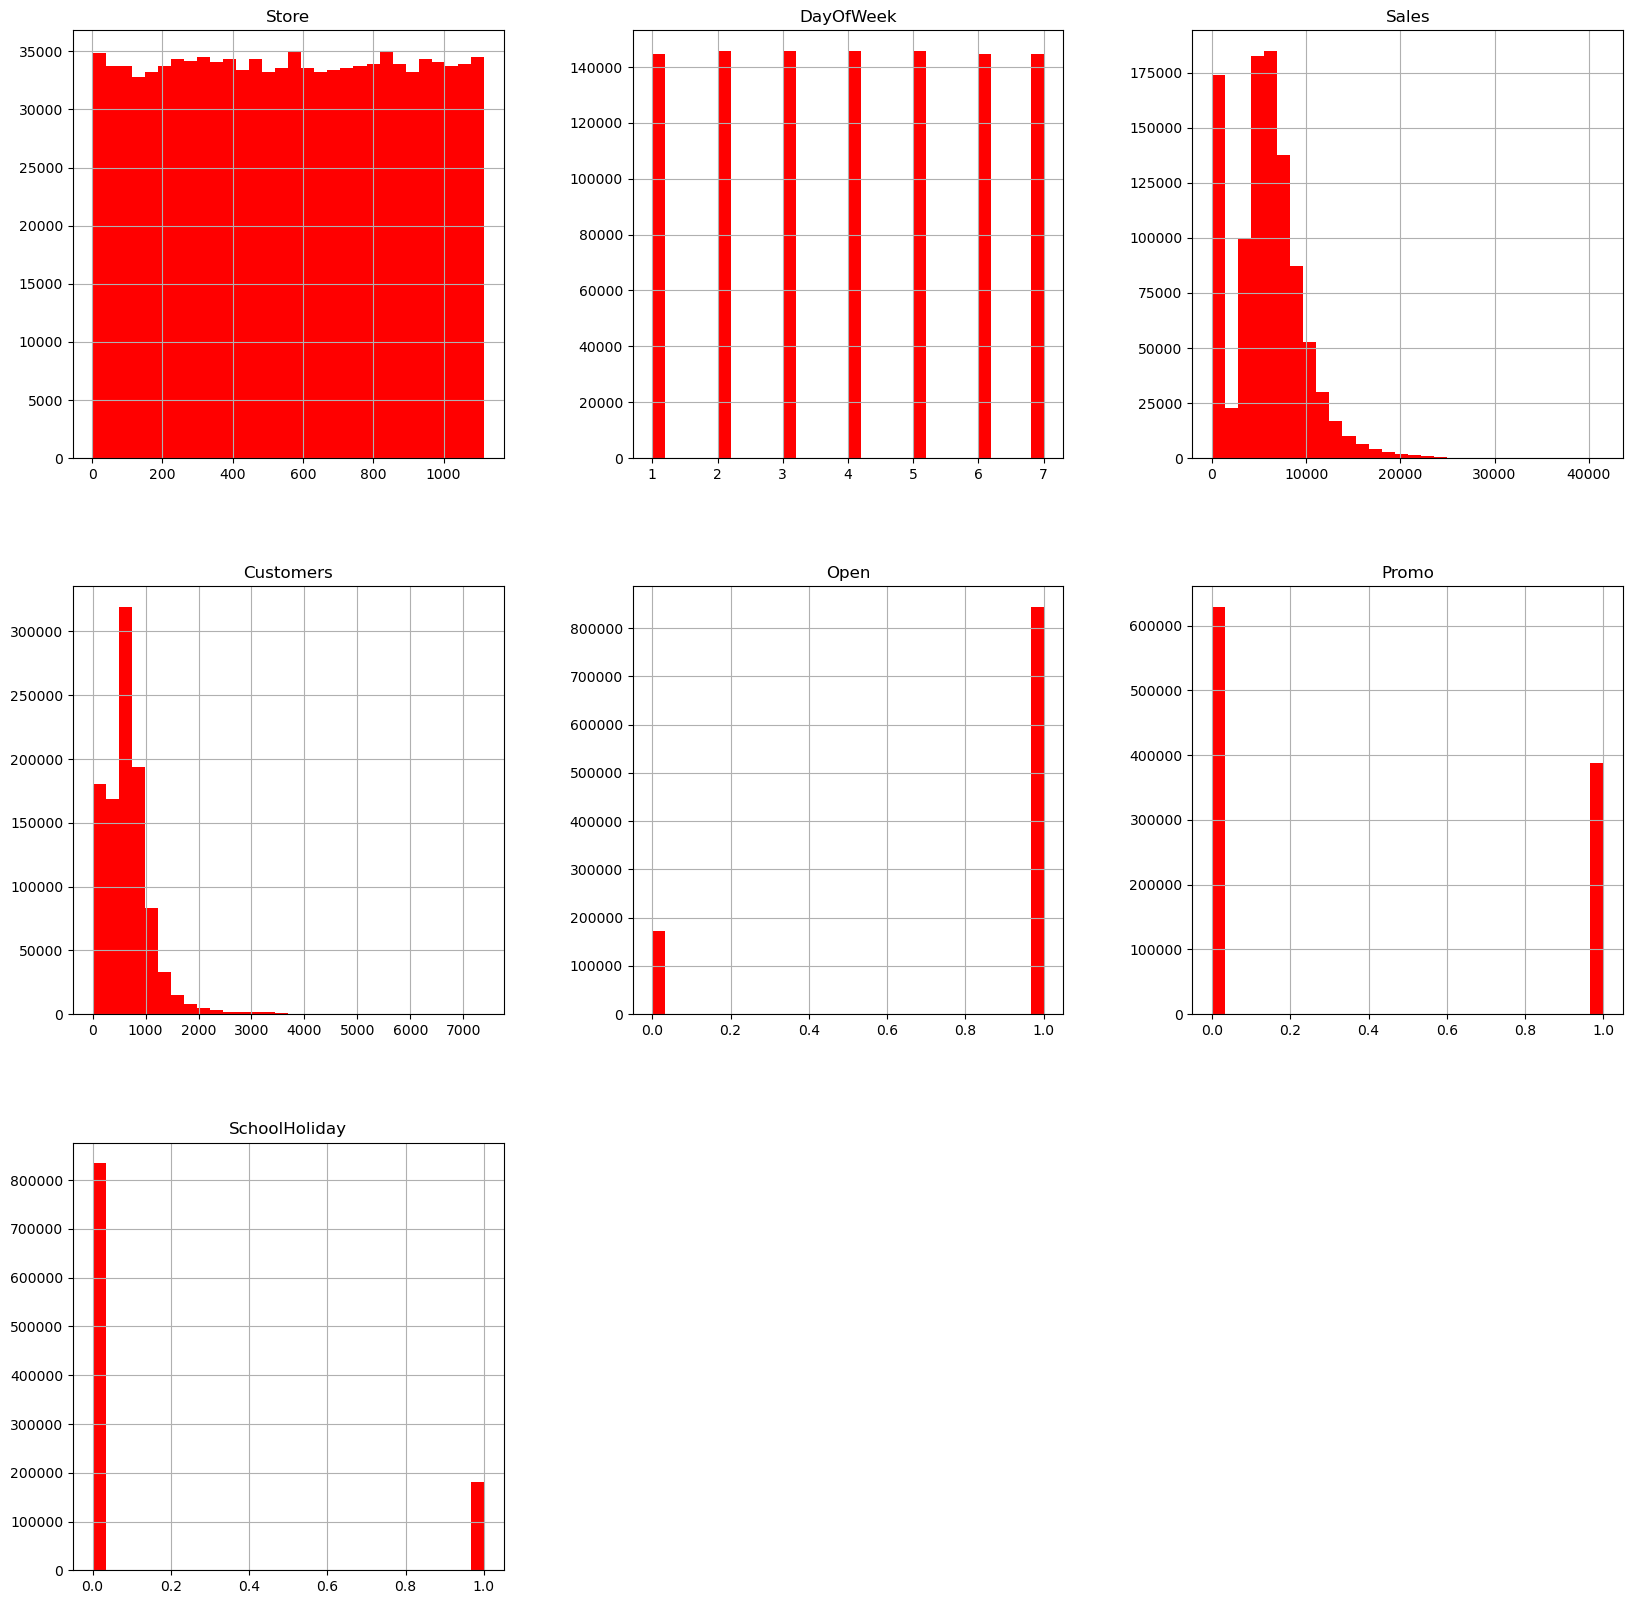

In [13]:
# Average 600 customers per day, maximum is 4500 (note that we can't see the outlier at 7388!)
# Data is equally distibuted across various Days of the week (~150000 observations x 7 day = ~1.1 million observation)
# Stores are open ~80% of the time
# Data is equally distributed among all stores (no bias)
# Promo #1 was running ~40% of the time
# Average sales around 5000-6000 Euros
# School holidays are around ~18% of the time
sales_train_df.hist(bins = 30, figsize=(20,20), color = 'r')


In [14]:
sales_train_df['Customers'].max()

7388

In [15]:
# Let's see how many stores are open and closed!
open_train_df = sales_train_df[sales_train_df['Open'] == 1]
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]

In [16]:
# Count the number of stores that are open and closed

len(open_train_df)


844392

In [17]:
# only keep open stores and remove closed stores
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [18]:
sales_train_df.drop(['Open'], axis = 1, inplace = True)

In [19]:
# Let's drop the open column since it has no meaning now
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [20]:
# Average sales = 6955 Euros,	average number of customers = 762	(went up)
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


TASK #3.2: EXPLORE STORES INFORMATION DATA

<Axes: >

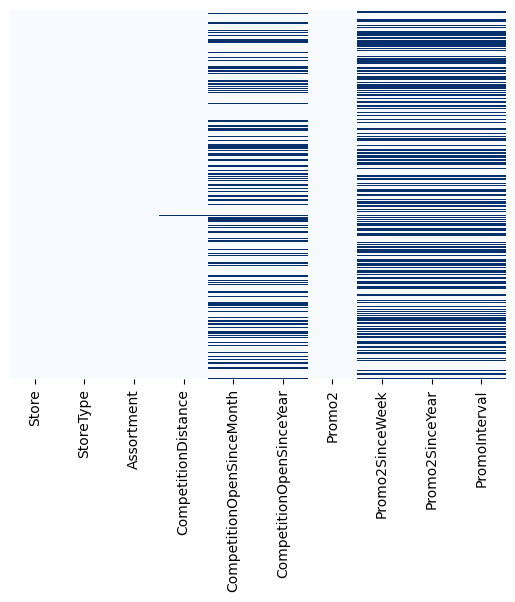

In [21]:
# Let's see if we have any missing data in the store information dataframe!
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')



In [22]:
# Let's take a look at the missing values in the 'CompetitionDistance'
# Only 3 rows are missing


store_info_df[store_info_df['CompetitionDistance'].isnull() ]


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [23]:
# Let's take a look at the missing values in the 'CompetitionOpenSinceMonth'
# many rows are missing = 354 (almost one third of the 1115 stores)
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']




In [25]:
for str in str_cols:
    store_info_df[str].fillna(0, inplace = True)
    

C:\Users\zsombor.veres-lakos\AppData\Local\Temp\ipykernel_47048\256492612.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_info_df[str].fillna(0, inplace = True)


<Axes: >

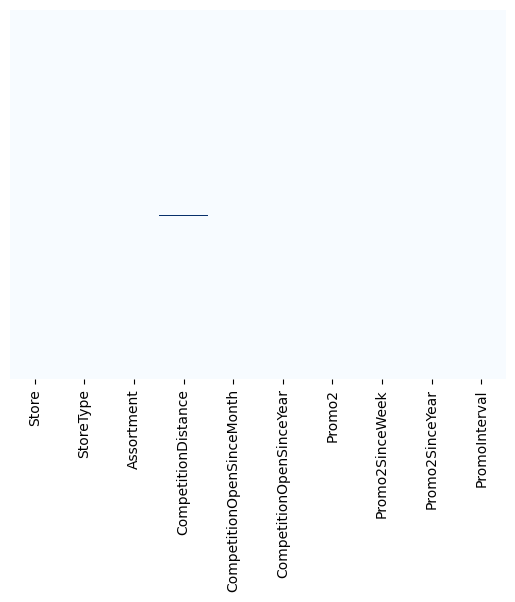

In [26]:
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

In [27]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean, inplace=True)

C:\Users\zsombor.veres-lakos\AppData\Local\Temp\ipykernel_47048\3080854527.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<bound method Series.mean of 0        1270.0
1         570.0
2       14130.0
3         620.0
4       29910.0
         ...   
1110     1900.0
1111     1880.0
1112     9260.0
1113      870.0
1114     5350.0
Name: CompetitionDistance, Length: 1115, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean, inplace=True)


<Axes: >

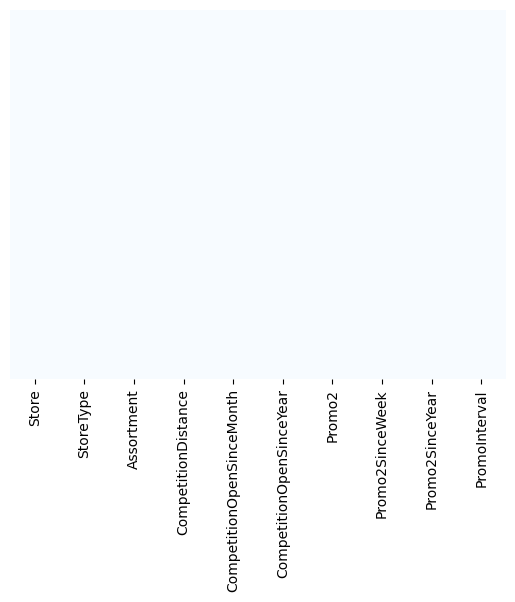

In [28]:
sns.heatmap(store_info_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<Axes: title={'center': 'CompetitionOpenSinceYear'}>,
        <Axes: title={'center': 'Promo2'}>],
       [<Axes: title={'center': 'Promo2SinceWeek'}>,
        <Axes: title={'center': 'Promo2SinceYear'}>]], dtype=object)

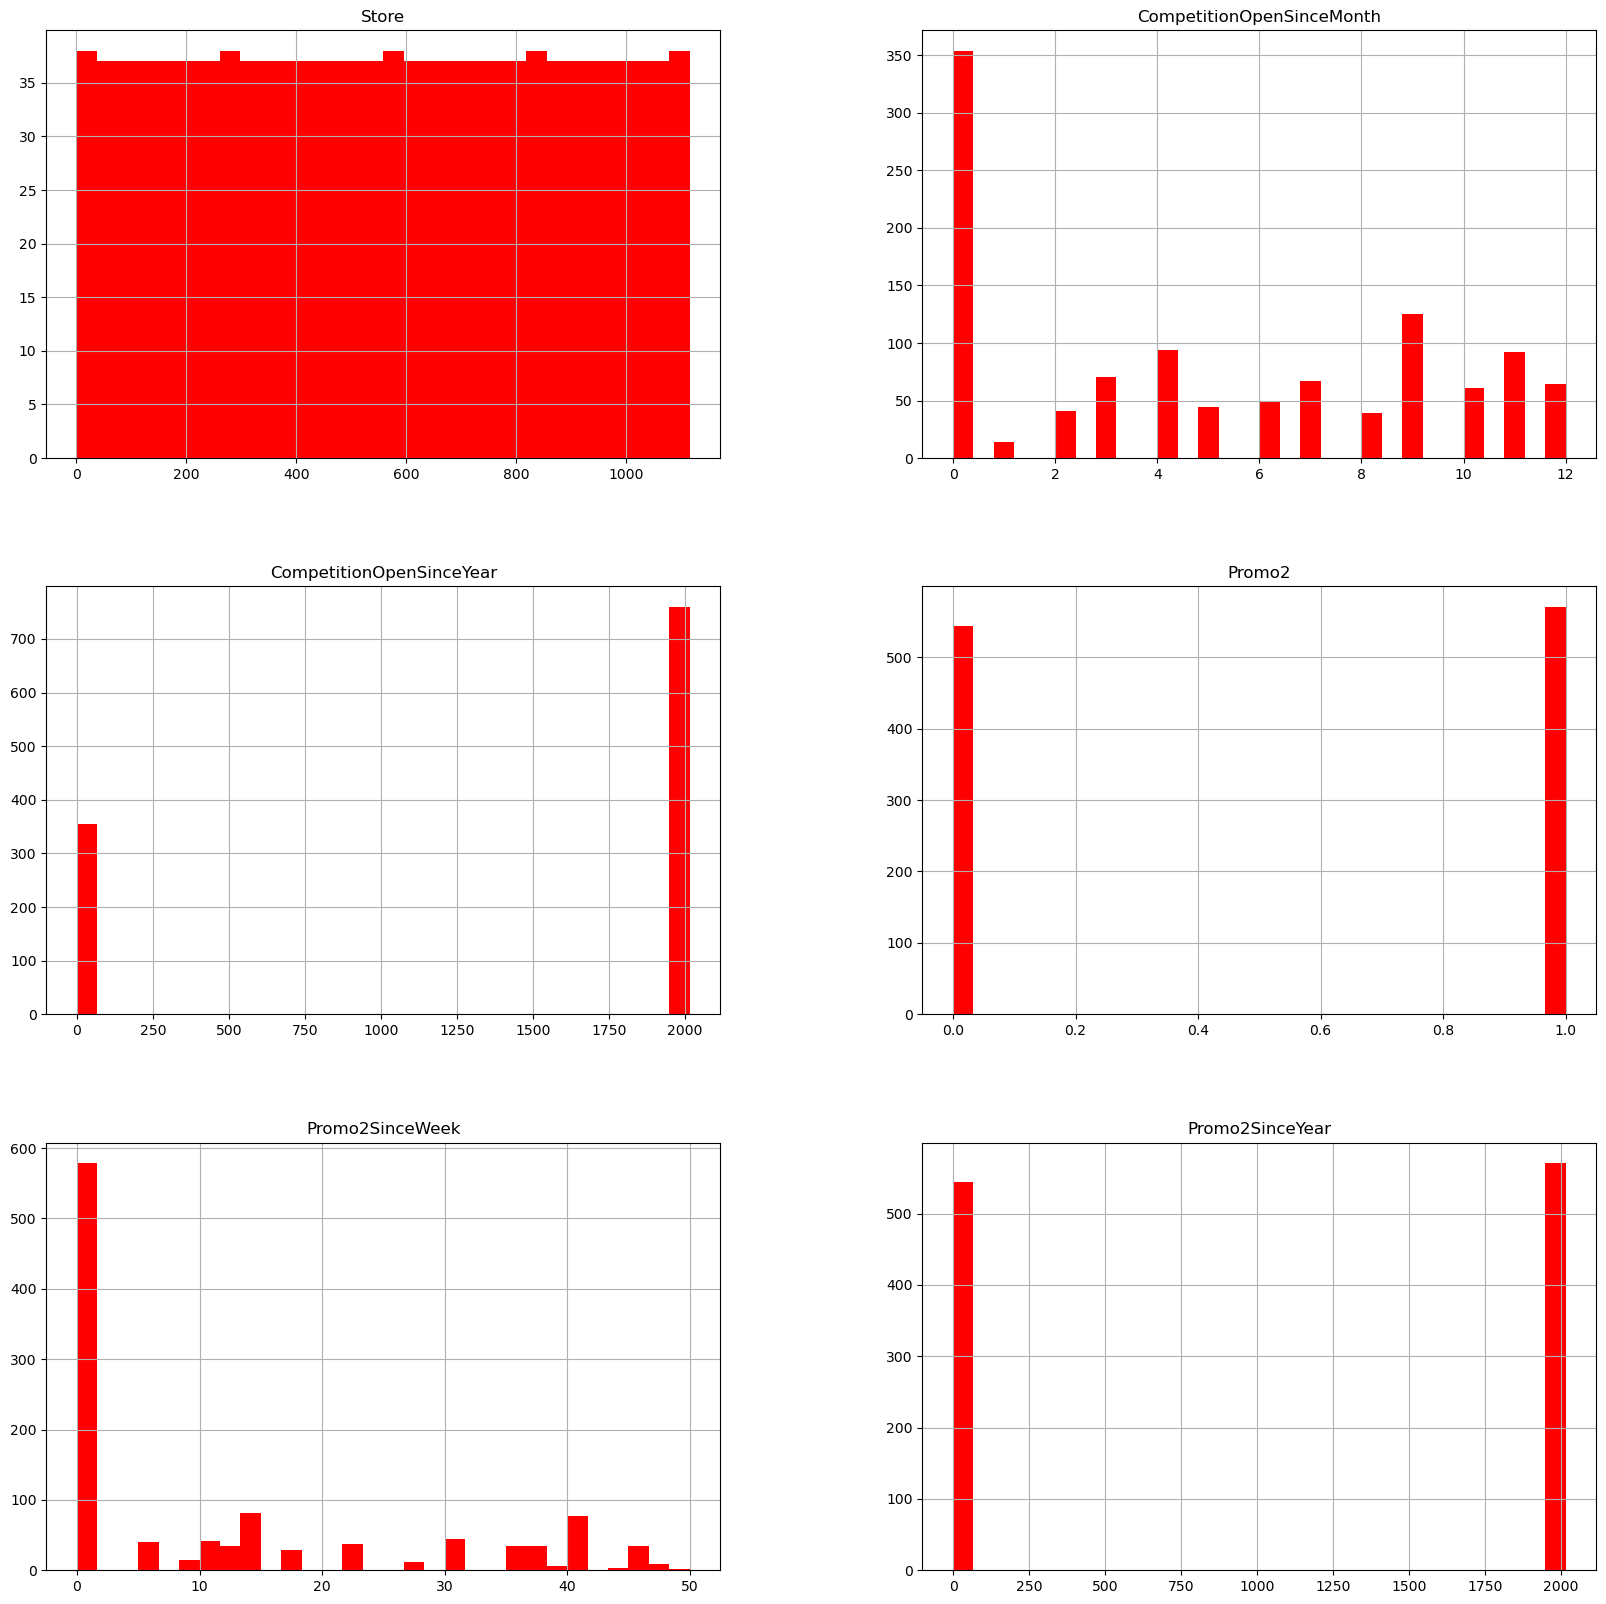

In [29]:
# It seems like if 'promo2' is zero, 'promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' information is set to zero
# There are 354 rows where 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' is missing
# Let's set these values to zeros
store_info_df.hist(bins = 30, figsize = (20,20), color = 'r')

In [30]:
# There are 3 rows with 'competitionDistance' values missing, let's fill them up with with average values of the 'CompetitionDistance' column


In [31]:
# half of stores are involved in promo 2
# half of the stores have their competition at a distance of 0-3000m (3 kms away)

TASK #3.3: EXPLORE MERGED DATASET

In [32]:
# Let's merge both data frames together based on 'store'
sales_train_all_df = pd.merge(sales_train_df, store_info_df, on = 'Store')

In [36]:
correlations = sales_train_all_df.corr(numeric_only=True)['Sales'].sort_values()

correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<Axes: >

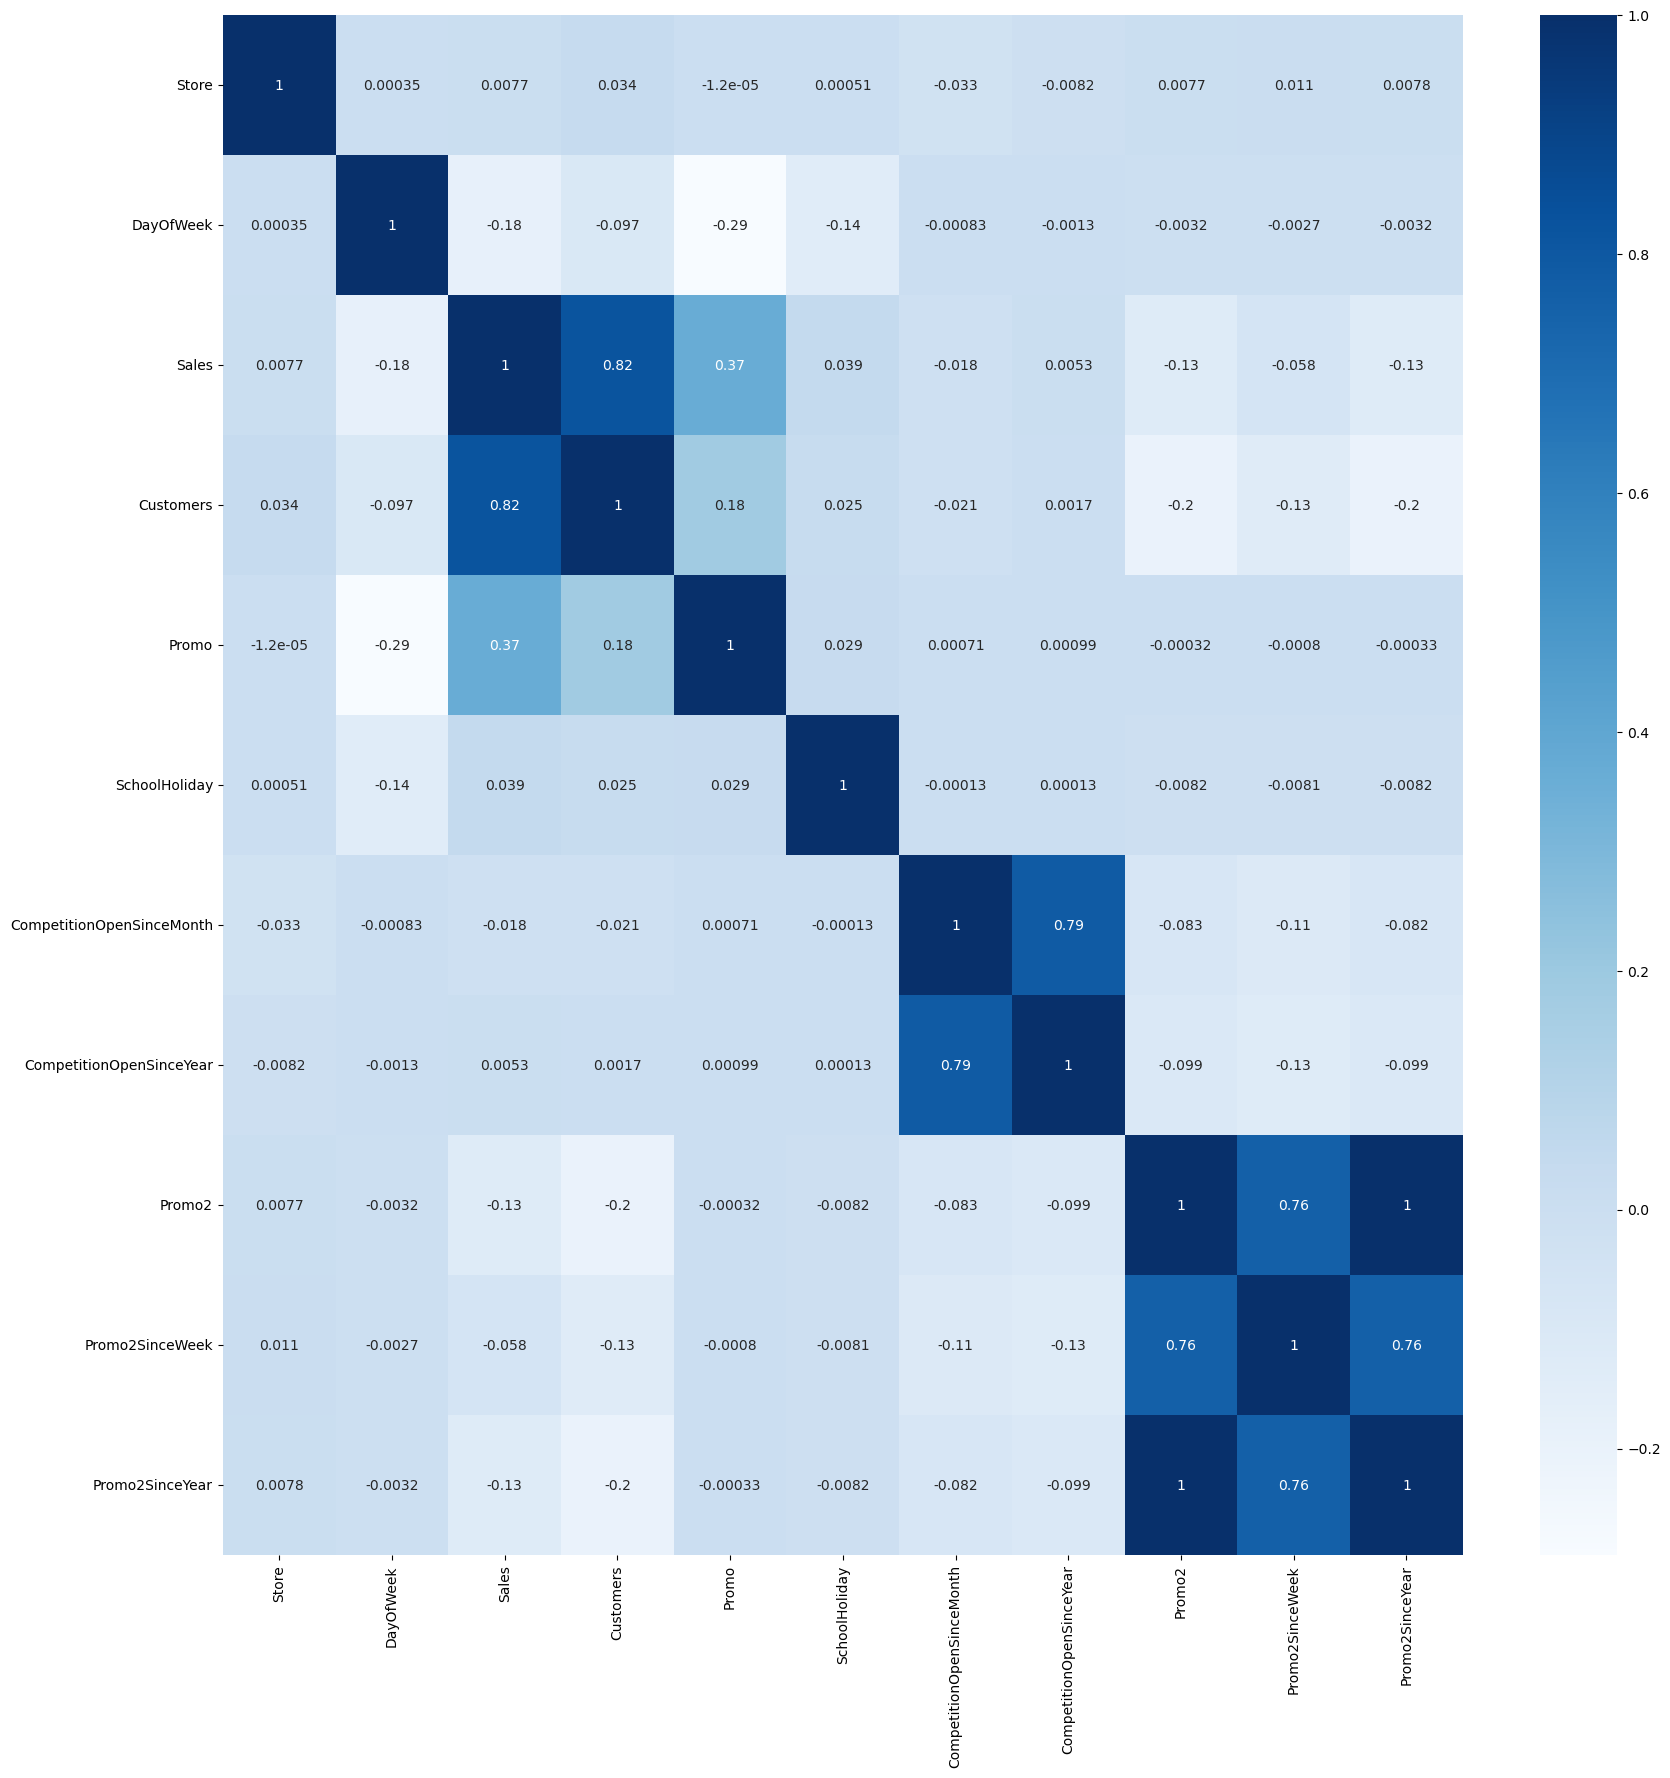

In [39]:
correlations = sales_train_all_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True, cmap='Blues')
# customers and promo are positively correlated with the sales
# Promo2 does not seem to be effective at all

In [27]:

# Customers/Prmo2 and sales are strongly correlated

In [41]:
# Let's separate the year and put it into a separate column
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year

In [44]:
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [45]:
# Let's do the same for the Day and Month
sales_train_all_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Day'],
      dtype='object')

Text(0.5, 1.0, 'Average Sales Per Month')

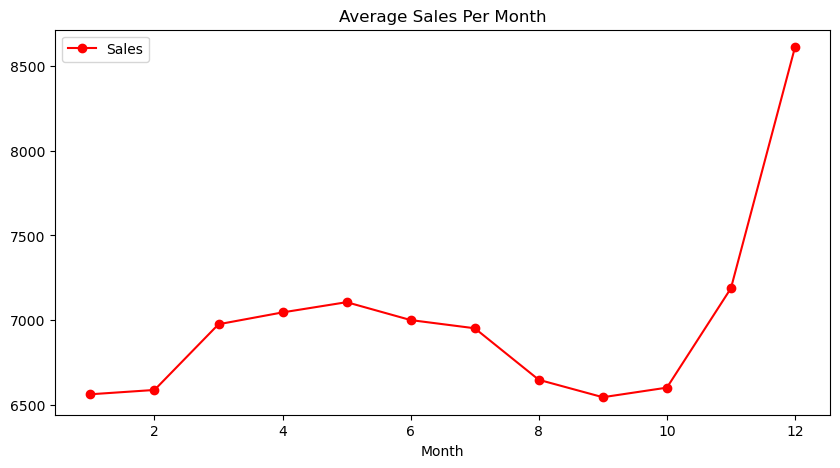

<Figure size 640x480 with 0 Axes>

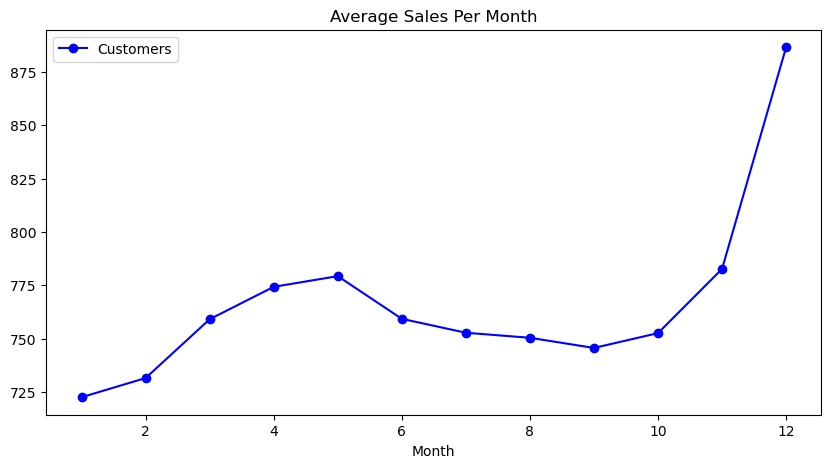

In [53]:
# Let's take a look at the average sales and number of customers per month
# 'groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column
# It looks like sales and number of customers peak around christmas timeframe


axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize= (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Month')


plt.figure()


axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize= (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Sales Per Month')



# sales_train_all_df.groupby('Month')[['Sales']].mean()

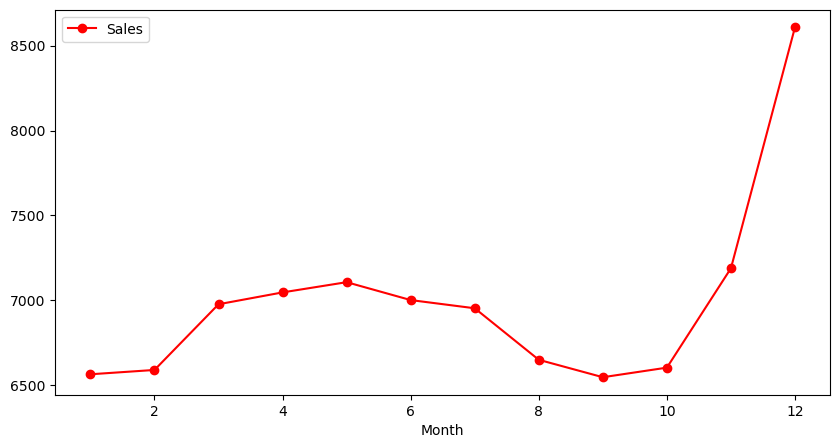

In [59]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize= (10, 5), marker = 'o', color = 'r')


Text(0.5, 1.0, 'Average Sales Per Day')

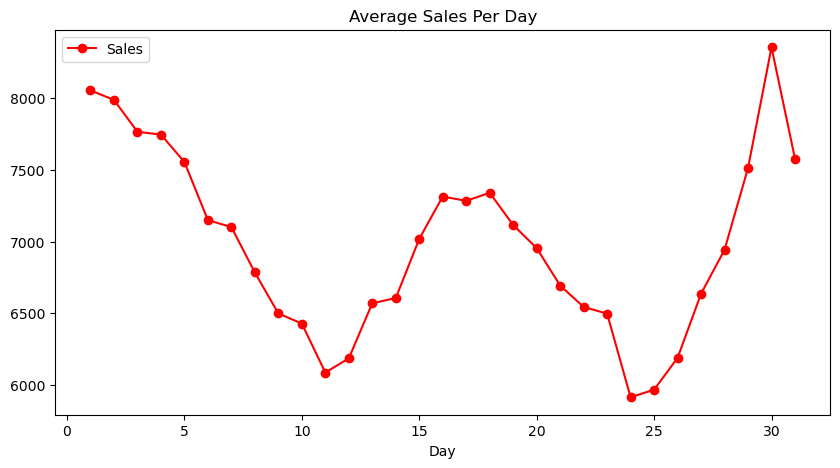

<Figure size 640x480 with 0 Axes>

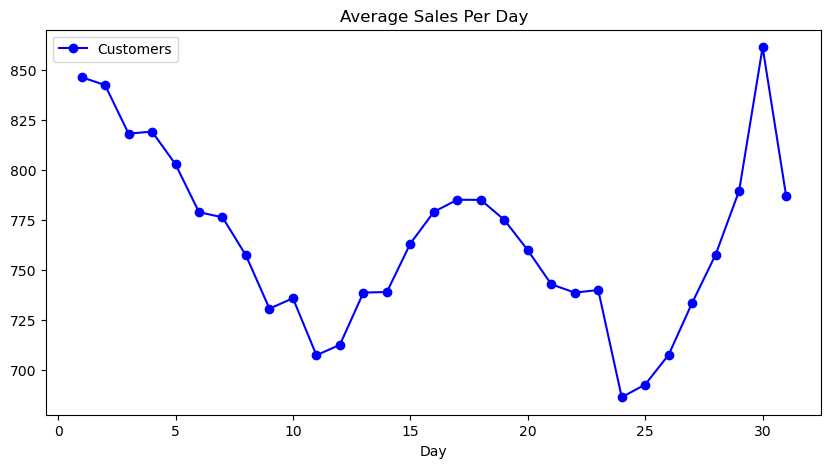

In [61]:
# Let's take a look at the sales and customers per day of the month instead
# Minimum number of customers are generally around the 24th of the month
# Most customers and sales are around 30th and 1st of the month

axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize= (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')


plt.figure()


axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize= (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Sales Per Day')


Text(0.5, 1.0, 'Average Sales Per Day')

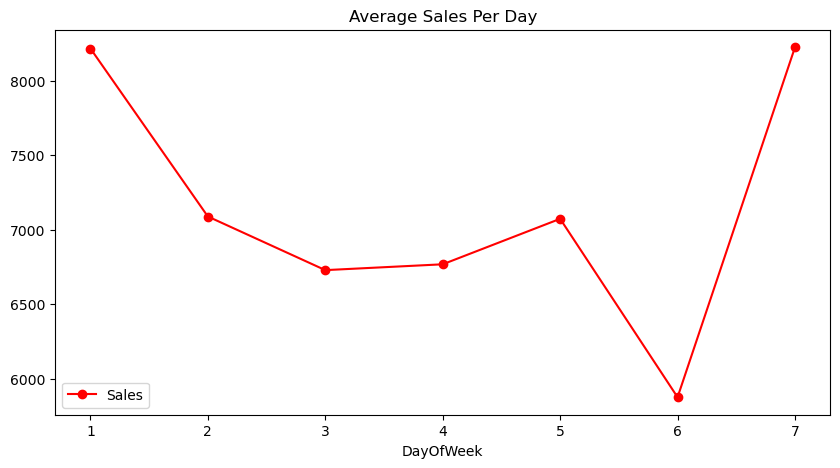

<Figure size 640x480 with 0 Axes>

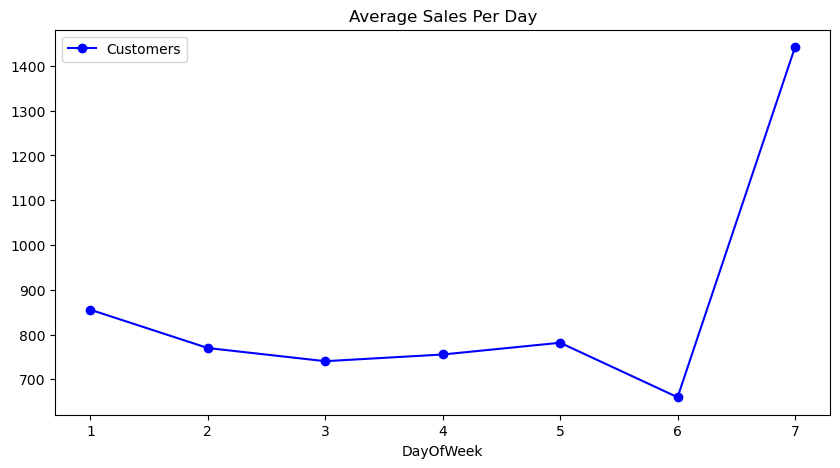

In [63]:
# Let's do the same for the day of the week  (note that 7 = Sunday)

axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize= (10, 5), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day of the week')


plt.figure()


axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize= (10, 5), marker = 'o', color = 'b')
axis.set_title('Average Sales Per Day of the week')


TypeError: agg function failed [how->mean,dtype->object]

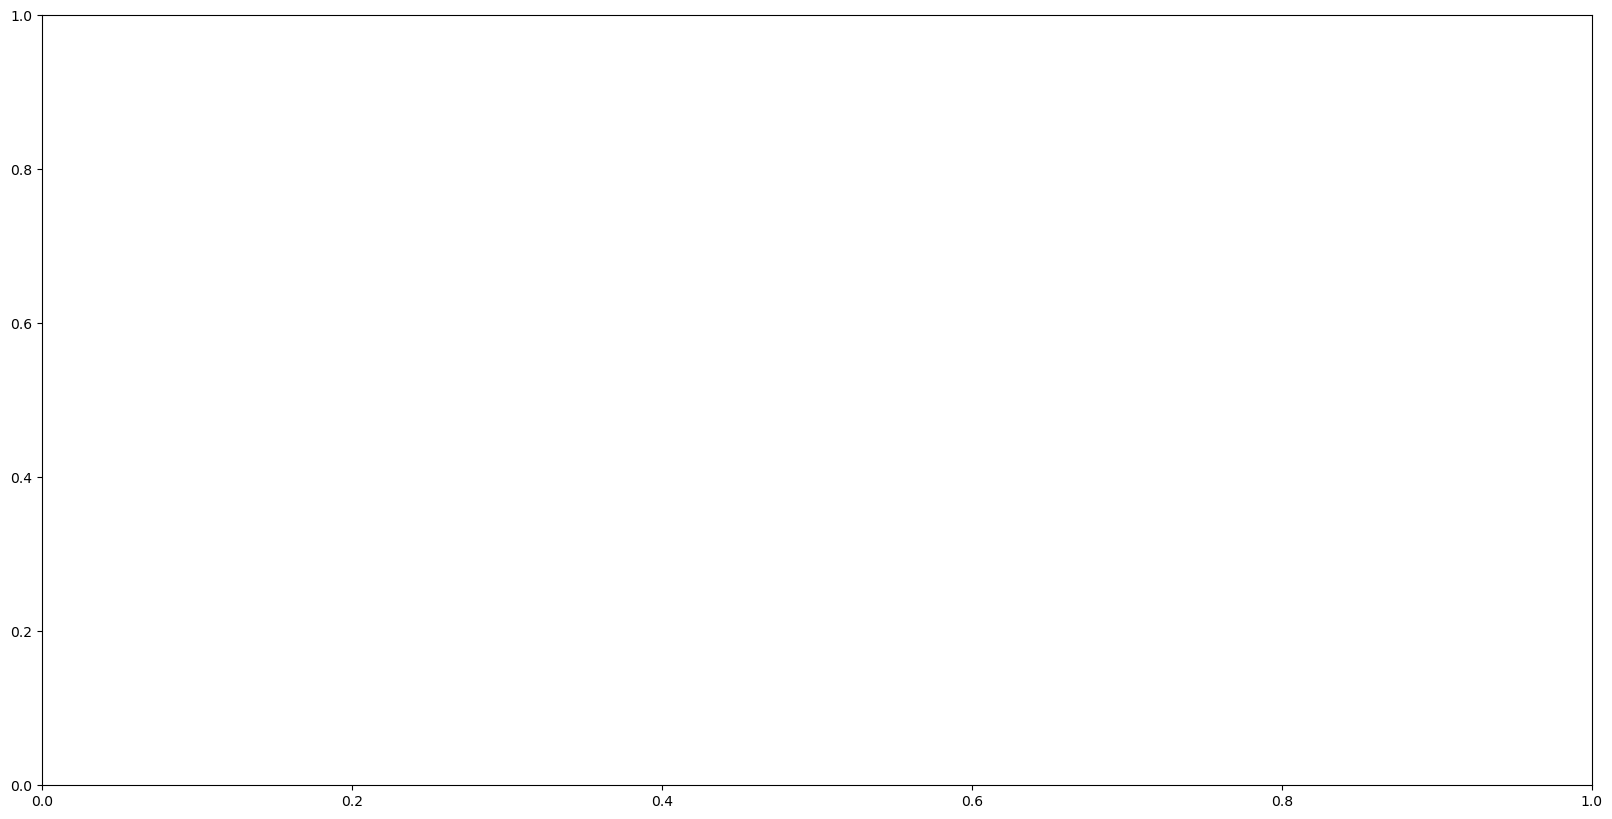

In [64]:
fig, ax = plt.subplots(figsize = (20, 10))

sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

# TASK #4: UNDERSTAND THE INTUITION BEHIND FACEBOOK PROPHET

![alt text](https://drive.google.com/uc?id=1I4lBgLaqERF_-lpGYLuht02wJmwcLGG-)

![alt text](https://drive.google.com/uc?id=1CZ24f-TbnRzaXV9Arke0fNTUm7Kon1gK)

![alt text](https://drive.google.com/uc?id=16gaoTeeuU5PxNZRHt8n2XyFJ52ft1xb7)

# TASK #5: TRAIN THE MODEL PART A

In [33]:
# import prophet

# TASK #6: TRAIN THE MODEL PART B


   - StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
   - SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools
  






In [34]:
# Get all the dates pertaining to school holidays


In [35]:
# Get all the dates pertaining to state holidays


In [36]:
# concatenate both school and state holidays


In [37]:
# Let's make predictions using holidays for a specific store


# EXCELLENT JOB!